Car price prediction plays an important role in automotive industry for several reasons. Lets take closer look below to some points.


1. Market Competition - Accurate car price prediction helps automotive manufacturers and dealerships remain competitive in the market. By analyzing various factors and predicting the price of a car, they can set competitive pricing strategies to attract customers and stay ahead of their competitors.

2. Customer Decision Making - Car price prediction assists potential buyers in making informed decisions. It allows them to estimate the cost of a vehicle accurately and evaluate whether it fits their budget. Knowing the predicted price also enables customers to compare different models and brands, facilitating a more informed purchasing process.

3. Inventory Management - For automotive manufacturers and dealerships, predicting car prices aids in managing inventory effectively. By forecasting the prices of different car models, they can adjust production and inventory levels accordingly. This prevents overproduction or understocking, optimizing the supply chain and minimizing costs.

4. Financial Planning - Car price prediction is crucial for financial planning within the automotive industry. It helps manufacturers and dealerships estimate their revenue and profit margins accurately. By incorporating price predictions into financial models, they can make strategic decisions regarding investments, production volume, and marketing efforts.

5. Resale Value Estimation - Car price prediction is valuable for individuals who want to estimate the resale value of their vehicles. By considering factors such as make, model, age, mileage, and market trends, they can approximate how much they may receive when selling their cars. This information aids in financial planning and helps owners make decisions about when to sell or trade-in their vehicles.

6. Market Research and Strategy - Car price prediction supports market research activities within the automotive industry. Manufacturers and dealerships can analyze historical pricing data, consumer behavior, and market trends to identify patterns and develop effective marketing and pricing strategies. This enables them to position their products appropriately in the market and cater to customer demands.

Overall, car price prediction plays a vital role in the automotive industry by enabling market competitiveness, aiding customer decision-making, facilitating inventory management, supporting financial planning, estimating resale values, and guiding market research and strategy development.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Task 1: Data Preprocessing:

In [2]:
car=pd.read_csv("C:/Users/mrpra/Downloads/car data.csv")

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#checking the number of rows and column
car.shape

(301, 9)

In [5]:
#Getting some insights from dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# above we can see that there are no null value present in the dataset

In [7]:
# now we check for the missing value in data set (columns)
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# above no missing value are found 

In [9]:
# checking the distribution of required dataset for feature selection
print(car.Fuel_Type.value_counts())
print(car.Seller_Type.value_counts())
print(car.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
# encoding the categorical data

car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Task 2: Feature Selection and Engineering:

In [12]:
# splitting the data into dependent(y) & independent(x) where y is target variable for price prediction

In [13]:
X = car.drop(['Car_Name','Selling_Price'],axis=1)
Y = car['Selling_Price']

In [14]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Task 3: Algorithms: Introducing two machine learning algorithms Random Forest and Gradient Boosting.

# Task 4: Training, Evaluation & Selection:

In [16]:
#splitting training and test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [18]:
# random forest regressor

In [19]:
regressor = RandomForestRegressor() 

In [20]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [21]:
#prediction training data

In [22]:
training_data_prediction=regressor.predict(X_train)

In [23]:
error_score = mean_squared_error(Y_train,training_data_prediction) 

In [24]:
print('mean square error :', error_score )

mean square error : 0.35029011029629586


In [25]:
# visualising the data

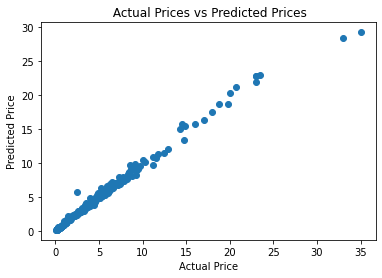

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
# prediction on test data

In [28]:
test_data_prediction=regressor.predict(X_test)

In [29]:
error_score = mean_squared_error(Y_test,test_data_prediction) 

In [30]:
print('mean square error :', error_score )

mean square error : 0.268771455483872


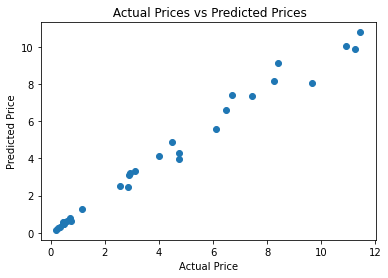

In [31]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [32]:
# gradient boosting regressor

In [33]:
gb_regressor = GradientBoostingRegressor()

In [34]:
gb_regressor.fit(X_train,Y_train)

GradientBoostingRegressor()

In [35]:
#predicting traing data

In [36]:
training_data_prediction=gb_regressor.predict(X_train)

In [37]:
error_score = mean_squared_error(Y_train,training_data_prediction) 

In [38]:
print('mean square error :', error_score )

mean square error : 0.11824075309722155


In [39]:
# visualising training data

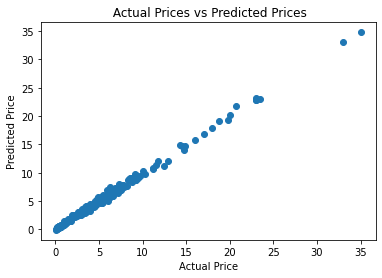

In [40]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [41]:
# predicting test data

In [42]:
test_data_prediction=gb_regressor.predict(X_test)

In [43]:
error_score = mean_squared_error(Y_test,test_data_prediction) 

In [44]:
print('mean square error :', error_score )

mean square error : 0.2515883747447771


In [45]:
# visualising test data

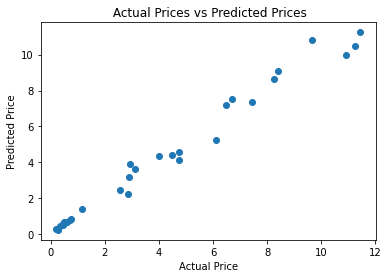

In [46]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Analyzing that which of the model is best suitable for acurate prediction

As to check the accuracy I applied the Mean Squared Error (MSE) on Random Forest and Gradient Boosting . So according to the MSE score or value, the value which is close to Zero (0) is more acurate. So to know which ML model is more acurate, we always compare the accuracy score of Test Data, now if we compare the the MSE score of Random Forest (0.2873232164516136) and MSE score fo Gradient Boosting (0.25158837474477697), the Gradieent Boosting performs well.

# So by this we can say that Gradient Boosting ML model is much more acurate than Random Forest ML Model.